In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import statsmodels.api as sm


def crosshair(img, point, size, color):
    """ Desenha um crosshair centrado no point.
        point deve ser uma tupla (x,y)
        color é uma tupla R,G,B uint8
    """
    x,y = point
    cv2.line(img,(x - size,y),(x + size,y),color,3)
    cv2.line(img,(x,y - size),(x, y + size),color,3)

# Exemplo de regressão linear em Python

In [2]:
background = np.zeros((400, 550, 3), dtype=np.uint8)

In [3]:
y = np.array([ 80., 110., 140., 170., 200., 230., 260., 290., 320., 350., 380.,
       410., 440., 470., 500.])

In [4]:
x = np.array([ 85.24603233,  59.52537694, 107.62039995,  95.39742991,
       132.8058387 , 199.00438625, 164.55620588, 146.17661588,
       166.31341531, 235.31630925, 194.29305358, 253.19297823,
       275.80559933, 260.10415532, 313.52093501])

In [5]:
def plot_points(x,y, img, color=(0,255,0)): 
    for i in range(x.shape[0]):
        crosshair(img, (int(x[i]),int(y[i])), size=5, color=color)
    plt.imshow(img)

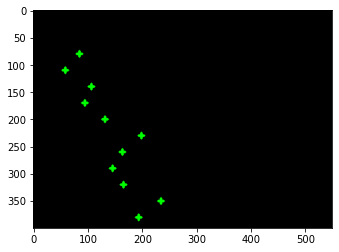

In [6]:
plot_points(x,y,background)

## Regressão linear com *statsmodels*

A regressão linear clássica tem a seguinte suposição:

$y = \beta_0 + \beta_1 x + \epsilon$, em que $\epsilon \sim N(0, \sigma)$ 

Ou seja: os valores de $y$ dependem linearmente de $x$ com um pequeno erro $\epsilon$

Mas como vamos classificar linhas quase *verticais* não podemos usar a regressão convencional. É mais produtivo escrever x em função de y()

$x = \beta_0 + \beta_1 y + \epsilon$, em que $\epsilon \sim N(0, \sigma)$ 


Notem que para pontos que são verticais a suposição da regressão linear (de que y=

In [7]:
y_c = sm.add_constant(y) # Lembrando que estamos fazendo de x em função de y !!
model = sm.OLS(x,y_c)
results = model.fit()
coef_angular = results.params[1] # Pegamos o beta 1
coef_linear =  results.params[0] # Pegamso o beta 0

Função encontrada

In [8]:
def f(y):
    x = coef_angular*y + coef_linear
    return x

Encontrando os pontos da reta para plot

In [9]:
def plot_regression_xfy(y, img, m, h, color=(255,0,0)):
    """Recebe m, h e dados y que geraram a função
        x = f(y)
        e uma imagem para plot
    """
    x = m*y + h
    y_min = int(min(y)) # precisa ser int para plotar na imagem
    y_max = int(max(y)) 

    x_min = int(f(y_min))
    x_max = int(f(y_max))    
    cv2.line(img, (x_min, y_min), (x_max, y_max), color, thickness=3);    
    plt.imshow(img)    
    

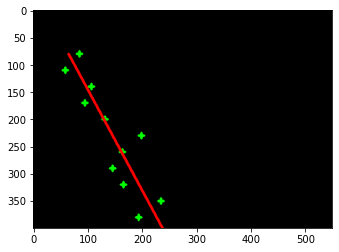

In [10]:
plot_regression_xfy(y, background, coef_angular, coef_linear)

## Regressão com Scikit-Learn

In [11]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

yr = y.reshape(-1,1)
xr = x.reshape(-1,1)


reg.fit(yr,xr)

LinearRegression()

In [12]:
background[:] = 0


In [13]:
m, h = reg.coef_, reg.intercept_

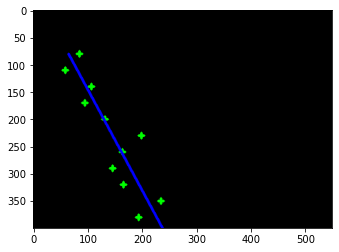

In [14]:
plot_points(x,y, background)
plot_regression_xfy(y, background,  m, h, color=(0,0,255))
